# Projeto Final

## Modelo de Previsão de Pagamentos em Atraso:

In [169]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest

In [142]:
df=pd.read_csv(r'C:\Users\ricky\Desktop\PGDCBI\Projeto Final\WA_Fn-UseC_-Accounts-Receivable.csv', encoding = 'latin')
df.set_index('invoiceNumber', inplace=True)

In [143]:
#Substitute CountryCode for its respective countryName
df['countryName'] = df['countryCode'].replace({ 391:'Germany',406:'Australia',818:'California, US',897:'Kansas, US',770:'Georgia, US' })
df.drop('countryCode',axis = 1,inplace = True)
df

,customerID,PaperlessDate,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,countryName
invoiceNumber,,,,,,,,,,,
611365,0379-NEVHP,4/6/2013,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,Germany
7900770,8976-AMJEO,3/3/2012,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,Australia
9231909,2820-XGXSB,1/26/2012,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,Germany
9888306,9322-YCTQO,4/6/2012,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,Australia
15752855,6627-ELFBK,11/26/2012,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,"California, US"
...,...,...,...,...,...,...,...,...,...,...,...
9982796720,6708-DPYTF,8/2/2012,10/18/2013,11/17/2013,79.61,No,12/1/2013,Electronic,44,14,Germany
9983237240,9841-XLGBV,1/3/2013,9/19/2012,10/19/2012,38.25,No,10/13/2012,Paper,24,0,Germany
9986249860,7856-ODQFO,8/5/2012,7/2/2012,8/1/2012,67.59,No,7/27/2012,Paper,25,0,"Georgia, US"


In [144]:
# Convert categorical variables em dummies
df['PaperlessBill_dummy'] = (pd.get_dummies(df['PaperlessBill'], drop_first=True)).astype(int)

df['Disputed'] = df['Disputed'].replace({'Yes': 1, 'No': 0})

country_dummies = (pd.get_dummies(df['countryName'], prefix='Country', drop_first=True)).astype(int) 
df = pd.concat([df, country_dummies], axis=1)

# Drop old variables
df.drop(['PaperlessBill', 'countryName'], axis=1, inplace=True)
df

,customerID,PaperlessDate,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,DaysToSettle,DaysLate,PaperlessBill_dummy,"Country_California, US","Country_Georgia, US",Country_Germany,"Country_Kansas, US"
invoiceNumber,,,,,,,,,,,,,,
611365,0379-NEVHP,4/6/2013,1/2/2013,2/1/2013,55.94,0,1/15/2013,13,0,1,0,0,1,0
7900770,8976-AMJEO,3/3/2012,1/26/2013,2/25/2013,61.74,1,3/3/2013,36,6,0,0,0,0,0
9231909,2820-XGXSB,1/26/2012,7/3/2013,8/2/2013,65.88,0,7/8/2013,5,0,0,0,0,1,0
9888306,9322-YCTQO,4/6/2012,2/10/2013,3/12/2013,105.92,0,3/17/2013,35,5,0,0,0,0,0
15752855,6627-ELFBK,11/26/2012,10/25/2012,11/24/2012,72.27,1,11/28/2012,34,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982796720,6708-DPYTF,8/2/2012,10/18/2013,11/17/2013,79.61,0,12/1/2013,44,14,0,0,0,1,0
9983237240,9841-XLGBV,1/3/2013,9/19/2012,10/19/2012,38.25,0,10/13/2012,24,0,1,0,0,1,0
9986249860,7856-ODQFO,8/5/2012,7/2/2012,8/1/2012,67.59,0,7/27/2012,25,0,1,0,1,0,0


### 2.2)	Descrição dos dados 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 611365 to 9990243864
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              2466 non-null   object 
 1   PaperlessDate           2466 non-null   object 
 2   InvoiceDate             2466 non-null   object 
 3   DueDate                 2466 non-null   object 
 4   InvoiceAmount           2466 non-null   float64
 5   Disputed                2466 non-null   int64  
 6   SettledDate             2466 non-null   object 
 7   DaysToSettle            2466 non-null   int64  
 8   DaysLate                2466 non-null   int64  
 9   PaperlessBill_dummy     2466 non-null   int32  
 10  Country_California, US  2466 non-null   int32  
 11  Country_Georgia, US     2466 non-null   int32  
 12  Country_Germany         2466 non-null   int32  
 13  Country_Kansas, US      2466 non-null   int32  
dtypes: float64(1), int32(5), int64(3),

In [146]:
#check min and max of invoice date
invoice_date_min = df['InvoiceDate'].min()
invoice_date_max = df['InvoiceDate'].max()

print(f'The minimum date of the invoice is: {invoice_date_min}')
print(f'The maximum date of the invoice is: {invoice_date_max}')

The minimum date of the invoice is: 1/1/2013
The maximum date of the invoice is: 9/9/2013


In [147]:
#convert date variables that are in obj type to datatime type
date_variables = ['PaperlessDate', 'InvoiceDate', 'DueDate', 'SettledDate']

for date in date_variables:
    df[date] = pd.to_datetime(df[date])

print(df.dtypes)
df

customerID                        object
PaperlessDate             datetime64[ns]
InvoiceDate               datetime64[ns]
DueDate                   datetime64[ns]
InvoiceAmount                    float64
Disputed                           int64
SettledDate               datetime64[ns]
DaysToSettle                       int64
DaysLate                           int64
PaperlessBill_dummy                int32
Country_California, US             int32
Country_Georgia, US                int32
Country_Germany                    int32
Country_Kansas, US                 int32
dtype: object


,customerID,PaperlessDate,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,DaysToSettle,DaysLate,PaperlessBill_dummy,"Country_California, US","Country_Georgia, US",Country_Germany,"Country_Kansas, US"
invoiceNumber,,,,,,,,,,,,,,
611365,0379-NEVHP,2013-04-06,2013-01-02,2013-02-01,55.94,0,2013-01-15,13,0,1,0,0,1,0
7900770,8976-AMJEO,2012-03-03,2013-01-26,2013-02-25,61.74,1,2013-03-03,36,6,0,0,0,0,0
9231909,2820-XGXSB,2012-01-26,2013-07-03,2013-08-02,65.88,0,2013-07-08,5,0,0,0,0,1,0
9888306,9322-YCTQO,2012-04-06,2013-02-10,2013-03-12,105.92,0,2013-03-17,35,5,0,0,0,0,0
15752855,6627-ELFBK,2012-11-26,2012-10-25,2012-11-24,72.27,1,2012-11-28,34,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982796720,6708-DPYTF,2012-08-02,2013-10-18,2013-11-17,79.61,0,2013-12-01,44,14,0,0,0,1,0
9983237240,9841-XLGBV,2013-01-03,2012-09-19,2012-10-19,38.25,0,2012-10-13,24,0,1,0,0,1,0
9986249860,7856-ODQFO,2012-08-05,2012-07-02,2012-08-01,67.59,0,2012-07-27,25,0,1,0,1,0,0


### 2.3)	Exploratory Data Analysis (EDA)

In [149]:
#describe method only to numeric variables to generate descriptive statistics 
var_to_check_describe = df.select_dtypes(include=['int', 'float']).columns.tolist()
df[var_to_check_describe].describe()

,InvoiceAmount,Disputed,DaysToSettle,DaysLate,PaperlessBill_dummy,"Country_California, US","Country_Georgia, US",Country_Germany,"Country_Kansas, US"
count,2466.000000,2466.000000,2466.00000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,59.895856,0.227494,26.44485,3.442417,0.512165,0.156934,0.205191,0.249797,0.160584
std,20.435838,0.419299,12.33493,6.290607,0.499953,0.363813,0.403923,0.432983,0.367221
min,5.260000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.400000,0.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.560000,0.000000,26.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,73.765000,0.000000,35.00000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,128.280000,1.000000,75.00000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### - Check if there are missing values

Missing Values:
customerID                0
PaperlessDate             0
InvoiceDate               0
DueDate                   0
InvoiceAmount             0
Disputed                  0
SettledDate               0
DaysToSettle              0
DaysLate                  0
PaperlessBill_dummy       0
Country_California, US    0
Country_Georgia, US       0
Country_Germany           0
Country_Kansas, US        0
dtype: int64


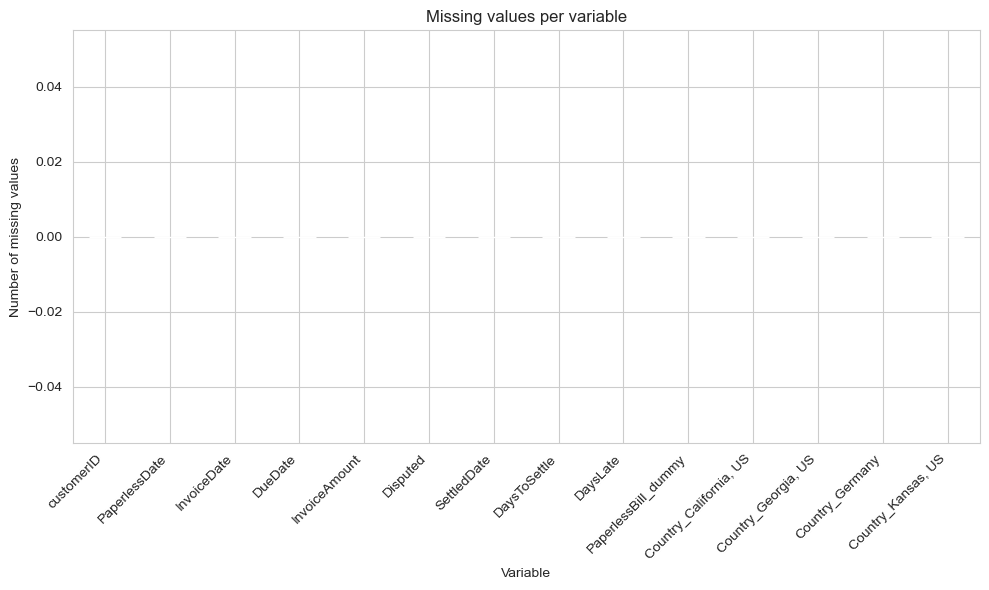

In [150]:
#check missing values
missing_values = df.isna().sum()

print("Missing Values:")
print(missing_values)

# Plot bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing values per variable')
plt.xlabel('Variable')
plt.ylabel('Number of missing values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [151]:
#check if there are duplicated datapoints
df[df.duplicated]

,customerID,PaperlessDate,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,DaysToSettle,DaysLate,PaperlessBill_dummy,"Country_California, US","Country_Georgia, US",Country_Germany,"Country_Kansas, US"
invoiceNumber,,,,,,,,,,,,,,


##### Não existem missing values nem valores duplicados no dataset

#### - Outliers Detection

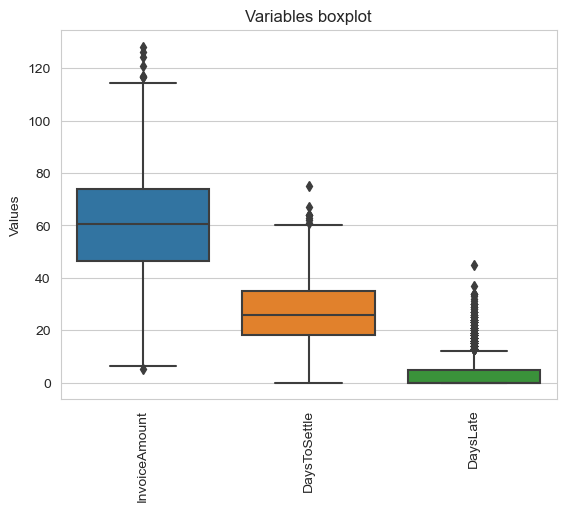

In [152]:
df_boxplot=df[['InvoiceAmount', 'DaysToSettle', 'DaysLate']].copy()

#check if there are outliers
sns.boxplot(data=df_boxplot)

# Configurar rótulos no eixo x
plt.xticks(ticks=np.arange(len(df_boxplot.columns)), rotation=90)

# Adicionar rótulo ao eixo y
plt.ylabel('Values')

# Adicionar título ao gráfico
plt.title('Variables boxplot')

# Exibir o gráfico
plt.show()

In [153]:
#create function to check and remove outliers 
def check_outliers(df):
    for col in df_boxplot:
    # calculate IQR for column Height
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # identify outliers
        threshold = 1.5
        outliers = df[(df[col] < Q1 - threshold * IQR) | (df[col] > Q3 + threshold * IQR)]

    print(f'Existem {outliers.shape[0]} outliers no dataset')

check_outliers(df)

# drop rows containing outliers
df_after_remove_outliers = df.drop(outliers.index)


Existem 259 outliers no dataset


#### Existem outliers no dataset, contudo, devido ao contexto que estamos a analisar, pode ser importante manter os mesmos.
Por este motivo, vamos avançar com o modelo com os outliers e avaliar os resultados com e sem os outliers para perceber se a sua presença afeta as previsões.

#### - Distribuições, tendências e relações

In [154]:
list(df.columns)

['customerID',
 'PaperlessDate',
 'InvoiceDate',
 'DueDate',
 'InvoiceAmount',
 'Disputed',
 'SettledDate',
 'DaysToSettle',
 'DaysLate',
 'PaperlessBill_dummy',
 'Country_California, US',
 'Country_Georgia, US',
 'Country_Germany',
 'Country_Kansas, US']

#### Analisar alguma relação dos clientes que estão atrasados com outras variáveis

In [187]:
#create new variavel to tag customers that are late in their payments
df['is_late'] = (df['DaysLate'] > 0).astype(int) 
df

,customerID,PaperlessDate,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,DaysToSettle,DaysLate,PaperlessBill_dummy,"Country_California, US","Country_Georgia, US",Country_Germany,"Country_Kansas, US",SettledYear,SettledMonth,is_late
invoiceNumber,,,,,,,,,,,,,,,,,
611365,0379-NEVHP,2013-04-06,2013-01-02,2013-02-01,55.94,0,2013-01-15,13,0,1,0,0,1,0,2013,1,0
7900770,8976-AMJEO,2012-03-03,2013-01-26,2013-02-25,61.74,1,2013-03-03,36,6,0,0,0,0,0,2013,3,1
9231909,2820-XGXSB,2012-01-26,2013-07-03,2013-08-02,65.88,0,2013-07-08,5,0,0,0,0,1,0,2013,7,0
9888306,9322-YCTQO,2012-04-06,2013-02-10,2013-03-12,105.92,0,2013-03-17,35,5,0,0,0,0,0,2013,3,1
15752855,6627-ELFBK,2012-11-26,2012-10-25,2012-11-24,72.27,1,2012-11-28,34,4,1,1,0,0,0,2012,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982796720,6708-DPYTF,2012-08-02,2013-10-18,2013-11-17,79.61,0,2013-12-01,44,14,0,0,0,1,0,2013,12,1
9983237240,9841-XLGBV,2013-01-03,2012-09-19,2012-10-19,38.25,0,2012-10-13,24,0,1,0,0,1,0,2012,10,0
9986249860,7856-ODQFO,2012-08-05,2012-07-02,2012-08-01,67.59,0,2012-07-27,25,0,1,0,1,0,0,2012,7,0


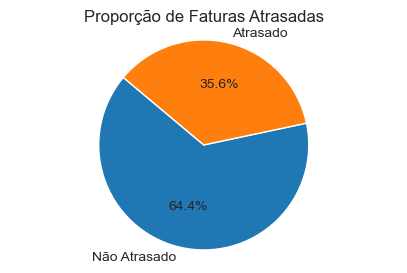

In [225]:
# Count of late invoices
late_counts = df['is_late'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(5, 3))
plt.pie(late_counts, labels=['Não Atrasado', 'Atrasado'], autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Faturas Atrasadas')
plt.axis('equal')  # Garantir que o gráfico seja circular
plt.show()

#### Analysis of late payments per country

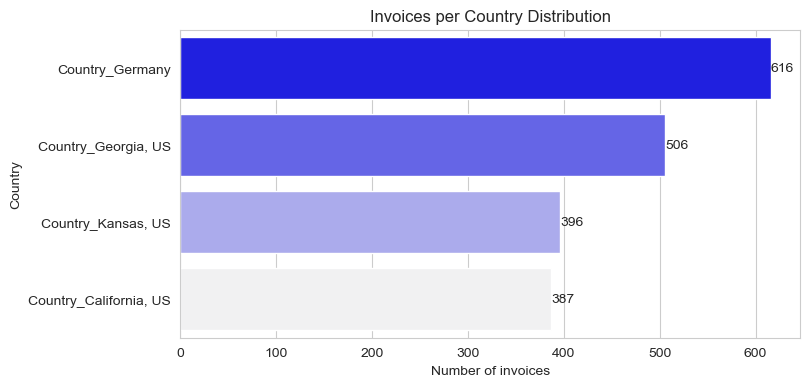

In [230]:
#Select dummy variables for country
country_dummies = df.filter(like='Country_')

# Sum invoices per country
invoices_by_country = (country_dummies.sum().sort_values(ascending=False))

# Choose color for bar chart
color = 'blue'

# Criar uma paleta de cores com diferentes tonalidades de azul
palete_colors = sns.light_palette(color, n_colors=len(invoices_by_country), reverse=True)

# Plot bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=invoices_by_country.values, y=invoices_by_country.index, palette=palete_colors)

# put legends in front of bars
for i, val in enumerate(invoices_by_country.values):
    plt.text(val + 0.01, i, f'{val}', va='center')

plt.title('Invoices per Country Distribution')
plt.xlabel('Number of invoices')
plt.ylabel('Country')
plt.show()

#### Calculate proportion of late invoices by country

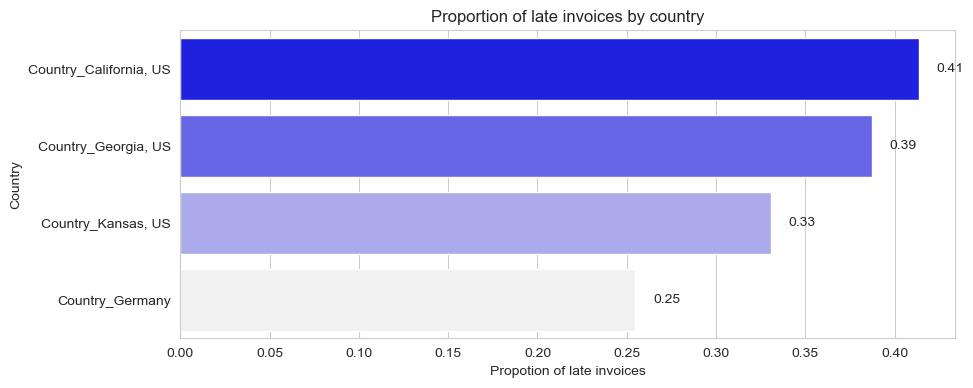

In [231]:
# Sum invoices per country
total_invoices_by_country = df.filter(like='Country_').sum()

# Sum of late payments per country
late_invoices_by_country = late_df.filter(like='Country_').sum()

# Calculate proportion of late invoices by country
proportion_late_invoices_by_country = (late_invoices_by_country / total_invoices_by_country).sort_values(ascending=False)

# Choose color for bar chart
color = 'blue'

# Criar uma paleta de cores com diferentes tonalidades de azul
palete_colors = sns.light_palette(color, n_colors=len(invoices_by_country), reverse=True)

# Plot bar chart
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=proportion_late_invoices_by_country.values, y=proportion_late_invoices_by_country.index, palette=palete_colors)

# put legends in front of bars
for i, val in enumerate(proportion_late_invoices_by_country.values):
    plt.text(val + 0.01, i, f'{val:.2f}', va='center')

plt.title('Proportion of late invoices by country')
plt.xlabel('Propotion of late invoices')
plt.ylabel('Country')
plt.show()

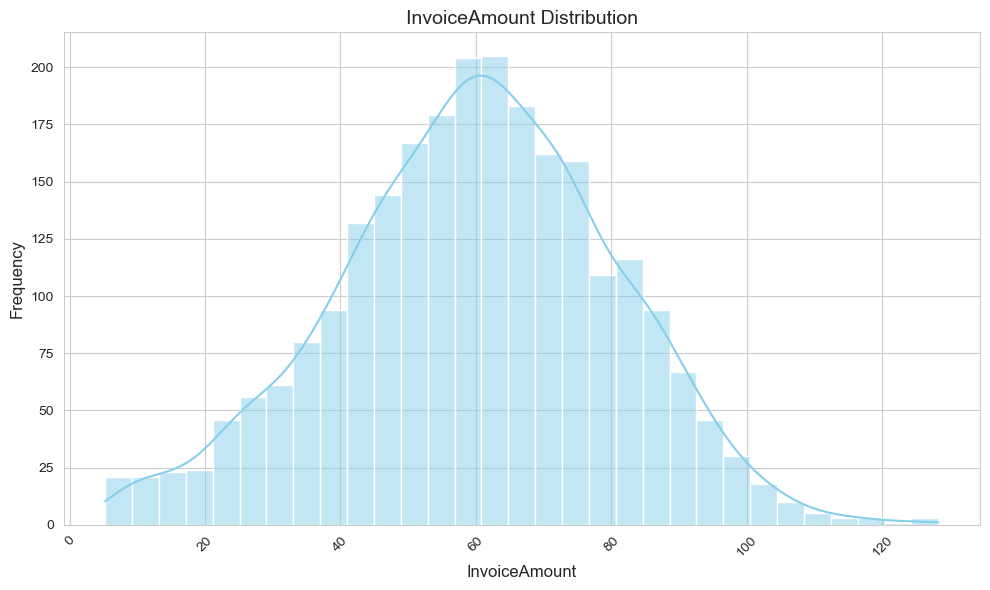

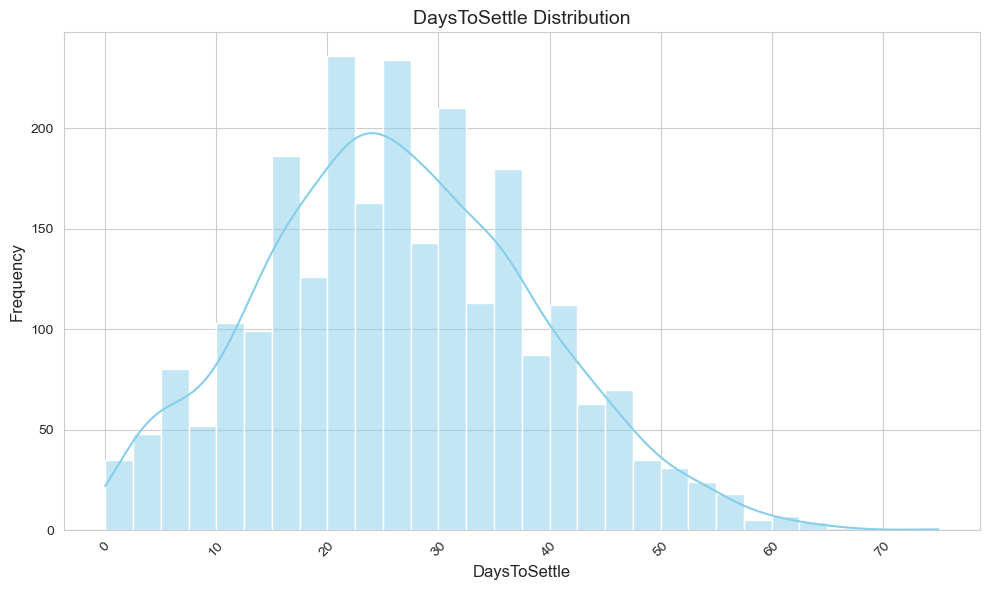

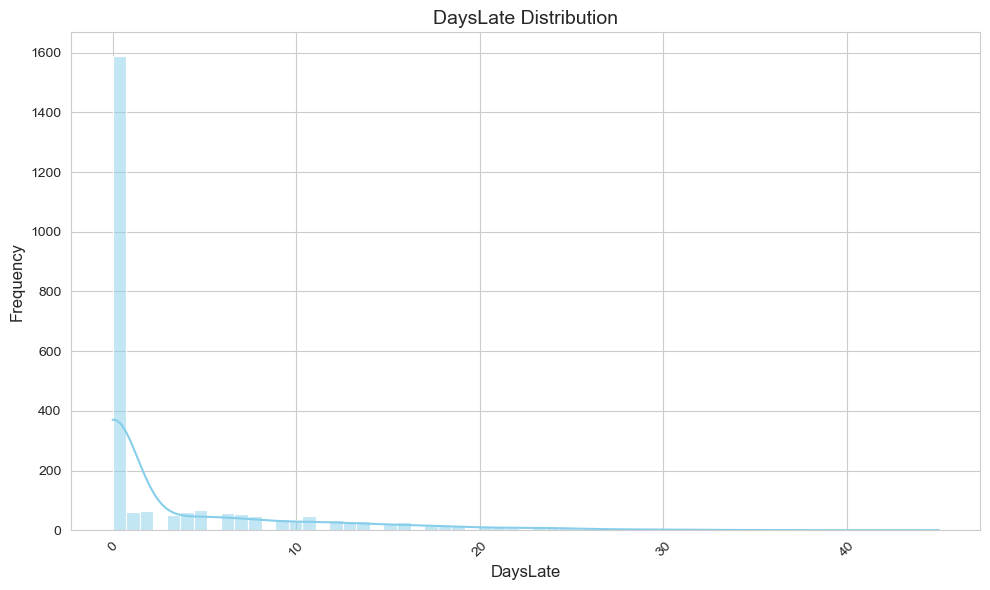

In [168]:
df_numerical_variables=df[['InvoiceAmount', 'DaysToSettle', 'DaysLate']].copy()

# Distribution plot for each variable
def plot_distribution(df):
    for col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'{col} Distribution', size=14)
        plt.xlabel(col, size=12)
        plt.ylabel('Frequency', size=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
plot_distribution(df_numerical_variables)

In [174]:
#Kolmogorov-Smirnov tests to test normal distribution

stat, p = kstest(df['DaysToSettle'], 'norm')
print('Estatística Kolmogorov-Smirnov:', stat)
print('p-valor:', p)

Estatística Kolmogorov-Smirnov: 0.9844570768264397
p-valor: 0.0


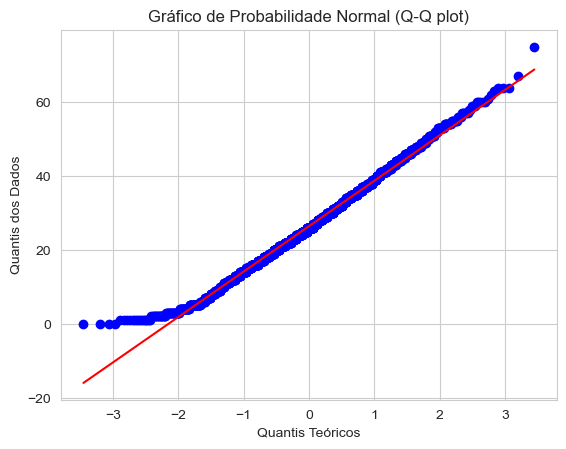

In [175]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gerar Q-Q plot
stats.probplot(df['DaysToSettle'], dist="norm", plot=plt)
plt.title('Gráfico de Probabilidade Normal (Q-Q plot)')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Dados')
plt.show()

In [176]:
from scipy.stats import shapiro
stat, p = shapiro(df['DaysToSettle'])
print('Estatística Shapiro-Wilk:', stat)
print('p-valor:', p)

Estatística Shapiro-Wilk: 0.992622971534729
p-valor: 7.39558969620191e-10
